# Analysis of Sales and Profits in 2022


This project involves analyzing the operations of a retail company that procures materials from factories and sells them to manufacturers. The pricing of the materials is determined by the negotiation between the salesperson and the manufacturer, with some salespeople opting for higher prices and lower sales volumes, while others choose lower prices and higher sales volumes.

The objective of this project is to answer the following questions:

1. Which employees generated the highest revenue for the company in 2022?
2. Which employees generated the highest profit for the company in 2022? Are they the same as those who generated the highest revenue?
3. Who deserves to receive the highest bonus at the end of the year?
4. What changes should be made to maximize the company's profit in the next year?

For the purposes of this project, the terms "employee," "salesperson," and "seller" are used interchangeably to refer to the individuals responsible for selling the materials to manufacturers. Please note that all names and amounts mentioned in this project have been changed to protect the privacy of the individuals and companies involved, although the overall trends and tendencies have been preserved.

## Data Wrangling

First, I will import libraries and load the data.

This dataset contains data on the monthly sales by each employee, as well as gross profit (what money was left after paying for the goods sold) and the profit margin (profit divided by net sales).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_excel('sales_2022.xlsx')

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [4]:
# see first 5 rows
df.head()

,Unnamed: 0,name,sales_units,sales_dollars,profit,profit_margin,month
0,0,John,10458.978,174509.3770,5917.934717,3.391184,jan
1,1,Ben,1925.760,31098.5900,1110.177345,3.569864,jan
2,2,Lili,10399.726,168382.1930,4932.269845,2.929211,jan
3,3,Nate,6371.849,116370.5205,7912.022200,6.798992,jan
4,4,Kate,2217.296,38147.4730,1317.442316,3.453551,jan


In [5]:
# drop first column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# turn floats into integers in numeric columns
numeric_columns = ['sales_units', 'sales_dollars', 'profit']
df[numeric_columns] = df[numeric_columns].astype(int)

In [7]:
# round 'profit_margin'
df.profit_margin = df.profit_margin.round(2)

In [8]:
df.head()

,name,sales_units,sales_dollars,profit,profit_margin,month
0,John,10458,174509,5917,3.39,jan
1,Ben,1925,31098,1110,3.57,jan
2,Lili,10399,168382,4932,2.93,jan
3,Nate,6371,116370,7912,6.80,jan
4,Kate,2217,38147,1317,3.45,jan


In [9]:
# view last 5 rows
df.tail()

,name,sales_units,sales_dollars,profit,profit_margin,month
104,Alex,412,7049,209,3.06,dec
105,Peter,741,12858,570,4.64,dec
106,Frank,249,3823,405,11.85,dec
107,Rita,35,552,62,12.68,dec
108,TOTAL,377480,6683439,264130,NaN,NaN


In [10]:
# function that returns values in last row of df
def save_total(col):       ## col as df.column
    return '{:,}'.format(col[len(col)-1])

In [11]:
# save totals
sales_total_u = save_total(df.sales_units) 
sales_total_d = save_total(df.sales_dollars)
profit_total = save_total(df.profit)

In [12]:
profit_total

'264,130'

In [13]:
# remove the last row (total)
df = df[:-1]
df.tail()

,name,sales_units,sales_dollars,profit,profit_margin,month
103,Kate,746,13545,471,3.60,dec
104,Alex,412,7049,209,3.06,dec
105,Peter,741,12858,570,4.64,dec
106,Frank,249,3823,405,11.85,dec
107,Rita,35,552,62,12.68,dec


In [14]:
# check months presented in the dataset
df.month.unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

In [15]:
# create new columns with thousands of dollars / units
df['profit_k'] = round(df['profit'] / 1000, 1)
df['sales_units_k'] = round(df['sales_units'] / 1000, 1)
df['sales_dollars_k'] = round(df['sales_dollars'] / 1000, 1)

## Data Visualization

First of all, let's get general idea how columns are correlated.

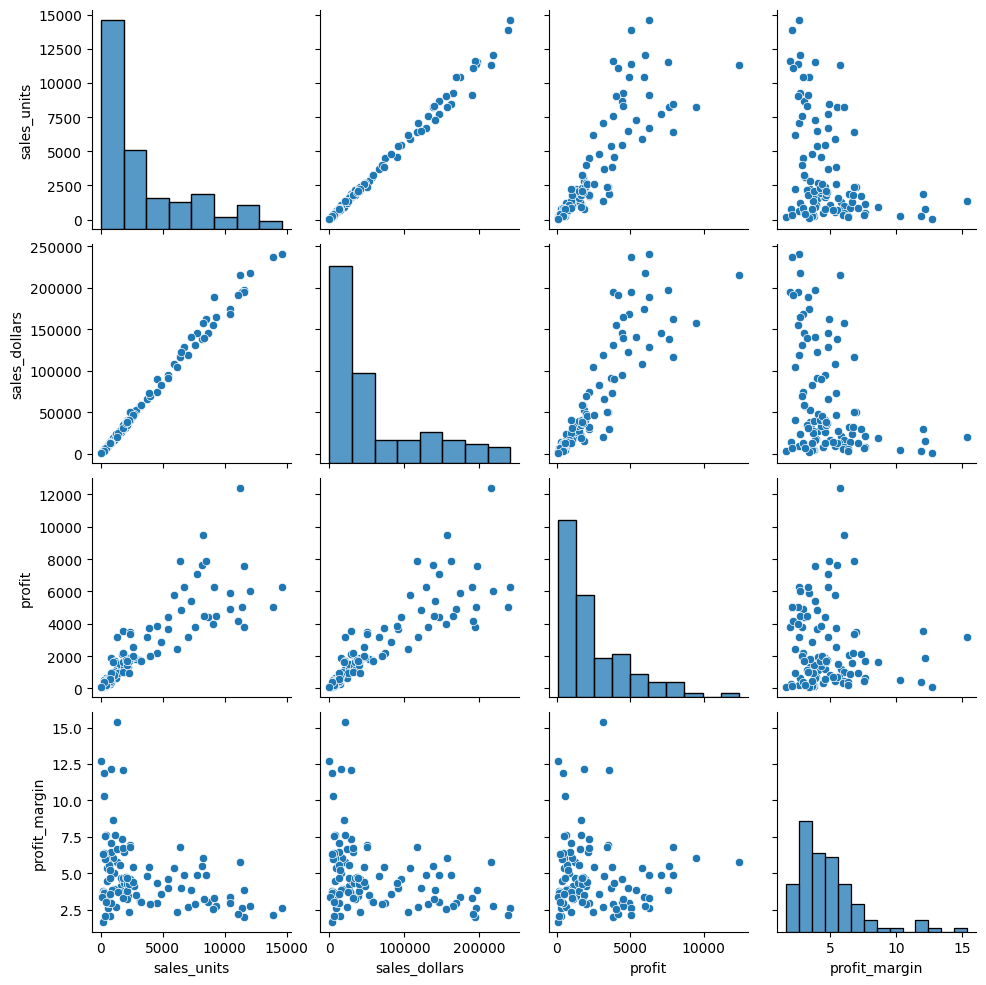

In [16]:
# see correlation between variables
sns.pairplot(df[['sales_units', 'sales_dollars', 'profit', 'profit_margin']])
plt.show()

As we might have expected, `sales_units` and `sales_dollars` are highly correlated, which means that a change in one variable would cause a change in another, which makes sense.
Profit also has an average correlation with the first two columns.

And all the columns have a negative distribution (the higher the values, the less frequent they are).

## Total Sales and Profits (all employees) per Month

Next, let's see if there are any monthly tendencies in the sales of the company.

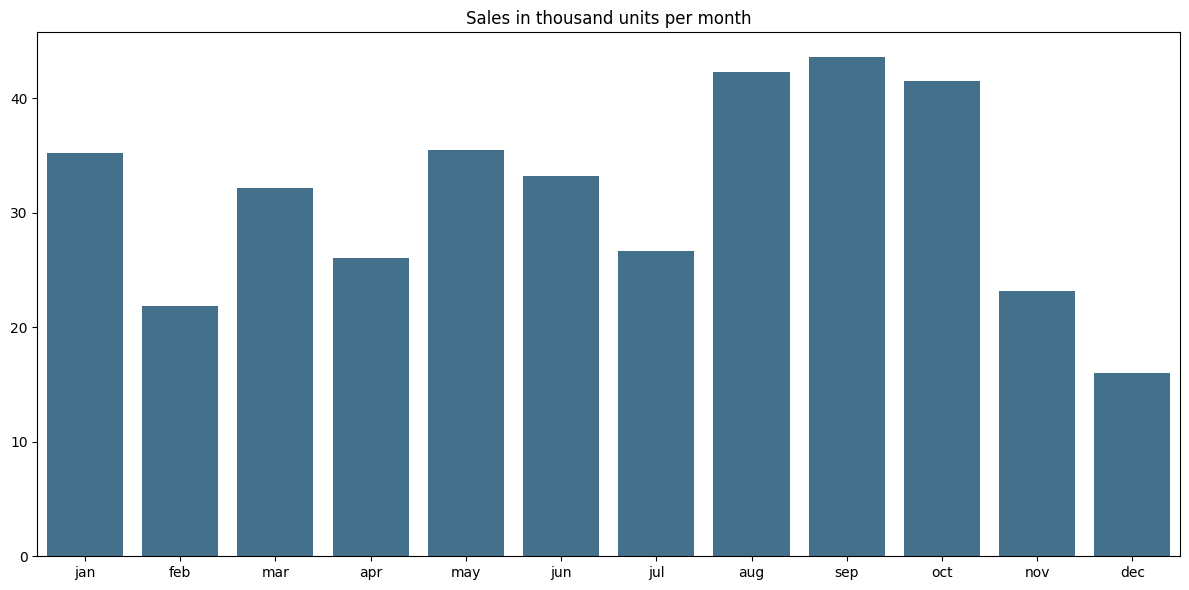

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df, x='month', y='sales_units_k', estimator=sum, errorbar=None,
    color="#397298")

# set xlabel
ax.set(ylabel='', xlabel='')

# set title
ax.set(title='Sales in thousand units per month')

plt.tight_layout()
plt.show()

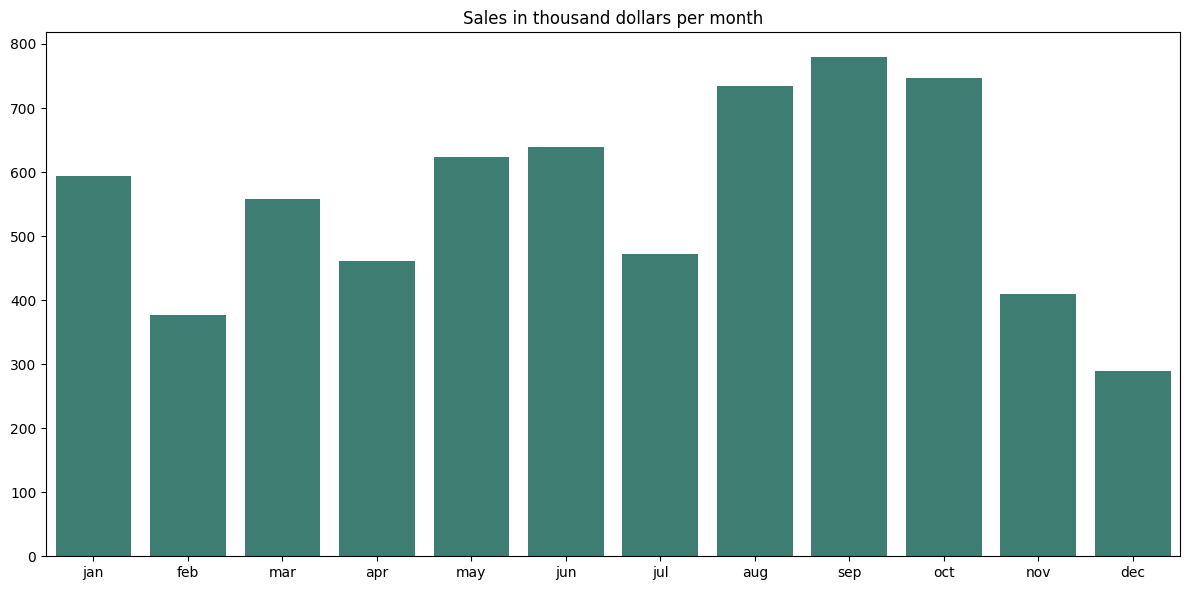

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df, x='month', y='sales_dollars_k', estimator=sum, errorbar=None, color='#348878')

# set xlabel
ax.set(ylabel='', xlabel='')

# set title
ax.set(title='Sales in thousand dollars per month')

plt.tight_layout()
plt.show()

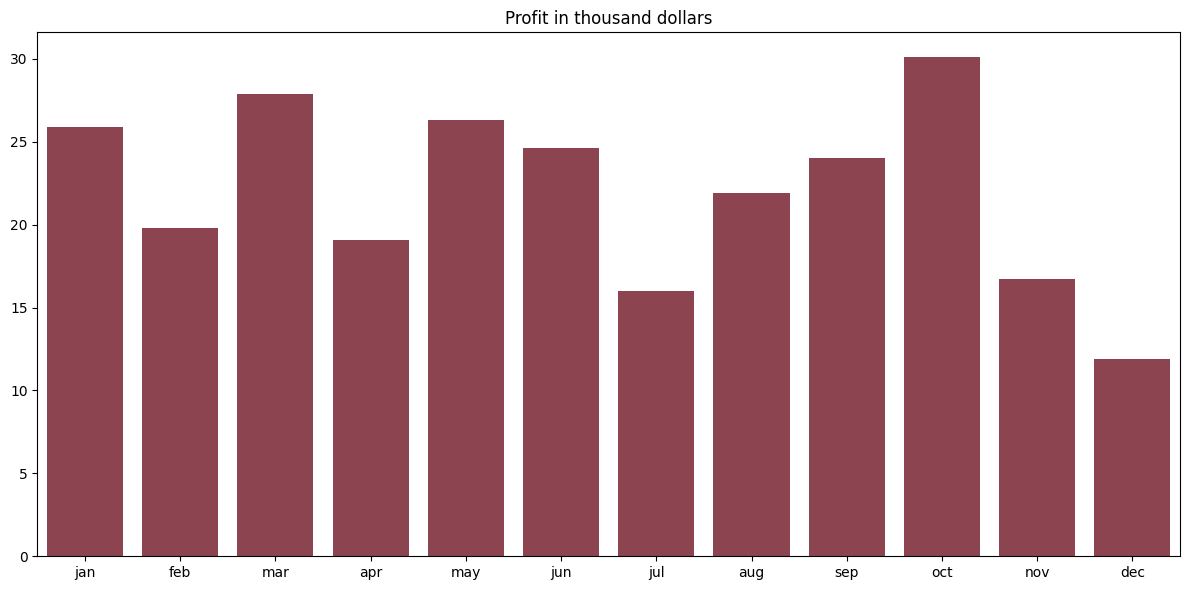

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df, x='month', y='profit_k', estimator=sum, errorbar=None,
    color="#983948")

# set xlabel
ax.set(ylabel='', xlabel='')

# set title
ax.set(title='Profit in thousand dollars')

plt.tight_layout()
plt.show()

According to the charts above:
- The months with the highest sales were **September**, **October**, **August** and with the lowest sales: **December**, **February**, **November** and also **April** and **July**.
- The highest profit was in **March**, **October**,  and also in **January** and **May**, the lowest gain was in **December** and also in **July** , **November**, **April** and **February**.

So we can see that October was successfull both in sales and profits, while February, April, July, November and December were low (with December as the lowest). 

## Sales and Profit per Salesperson (total in 2022)

Now, finally, let's focus on performance of sellers. First, we'll see how many units were sold by seller in the whole year. Then how much was it in dollars. And finally, how much profit each employee gained.

In [21]:
# count total sales per sales person and order them from the biggest to the smallest
sales_per_seller = df.groupby(['name'])['sales_units_k'].sum().reset_index().sort_values('sales_units_k', ascending = False).reset_index(drop=True)
sales_per_seller

,name,sales_units_k
0,John,107.6
1,Lili,100.1
2,Nate,80.7
3,Ben,23.7
4,Kate,21.4
5,Peter,19.7
6,Rita,12.2
7,Frank,6.8
8,Alex,5.2


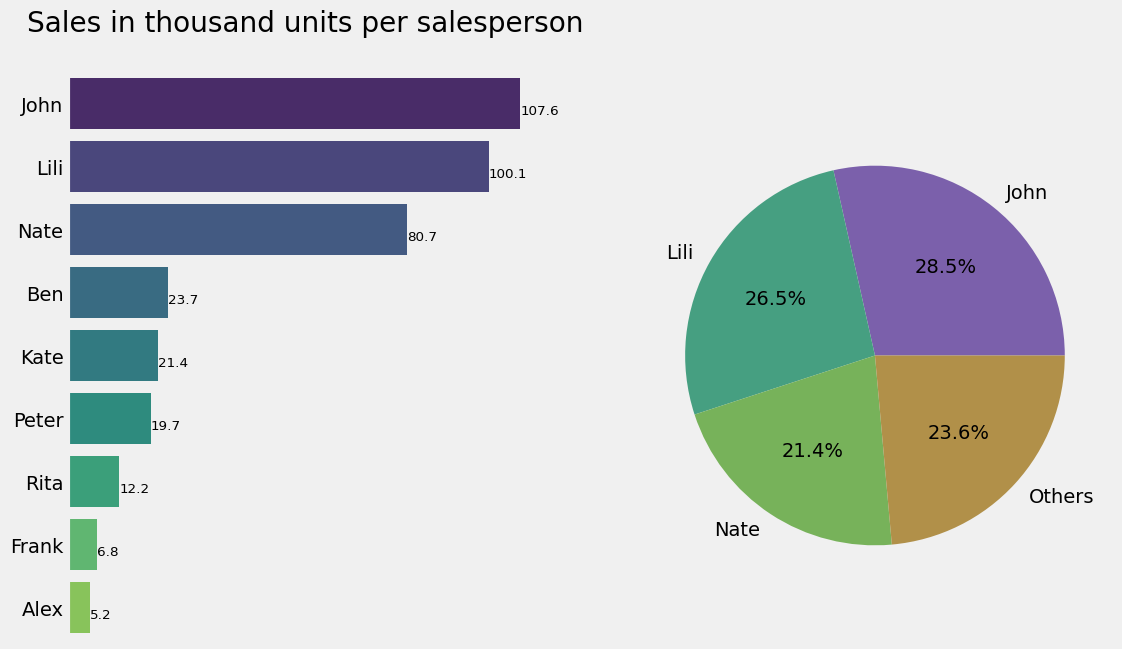

In [22]:
plt.style.use('fivethirtyeight')

fig = plt.subplots(figsize=(12, 7))

# bar plot
plt.subplot(1, 2, 1) # row 1, col 2 index 1

# add the plot
ax = sns.barplot(x='sales_units_k', y='name', data=df, order=sales_per_seller['name'], 
    estimator=sum, errorbar=None, palette=sns.color_palette('viridis', 10))

# set labels and title
ax.set(xlabel='sales in thousand units', ylabel='', title='Sales in thousand units per salesperson\n')

# remove x axis ticks
ax.get_xaxis().set_visible(False)

# set annotations
ax.bar_label(ax.containers[-1], fmt='\n%.1f', label_type='edge', size='x-small')

# pie chart
plt.subplot(1, 2, 2) 

# group all small values into one bin
sales_grouped = sales_per_seller.copy()
sales_grouped.loc[sales_grouped['sales_units_k'] < 80, 'name'] = 'Others'
sales_grouped = sales_grouped.groupby('name')['sales_units_k'].sum().reset_index()

plt.pie(sales_grouped['sales_units_k'], labels=sales_grouped['name'], 
    autopct='%.1f%%', colors=['#7B60AB','#469F81','#77B25A','#B19049'])
   
plt.show()

In [23]:
print('Total sales in 2022:', sales_total_u, 'units.')

Total sales in 2022: 377,480 units.


In [24]:
# count total sales in dollars
sales_per_seller_d = df.groupby(['name'])['sales_dollars_k'].sum().reset_index().sort_values('sales_dollars_k', ascending = False).reset_index(drop=True)
sales_per_seller_d

,name,sales_dollars_k
0,John,1855.6
1,Lili,1721.8
2,Nate,1527.1
3,Ben,420.9
4,Kate,381.9
5,Peter,342.6
6,Rita,233.8
7,Frank,109.6
8,Alex,90.1


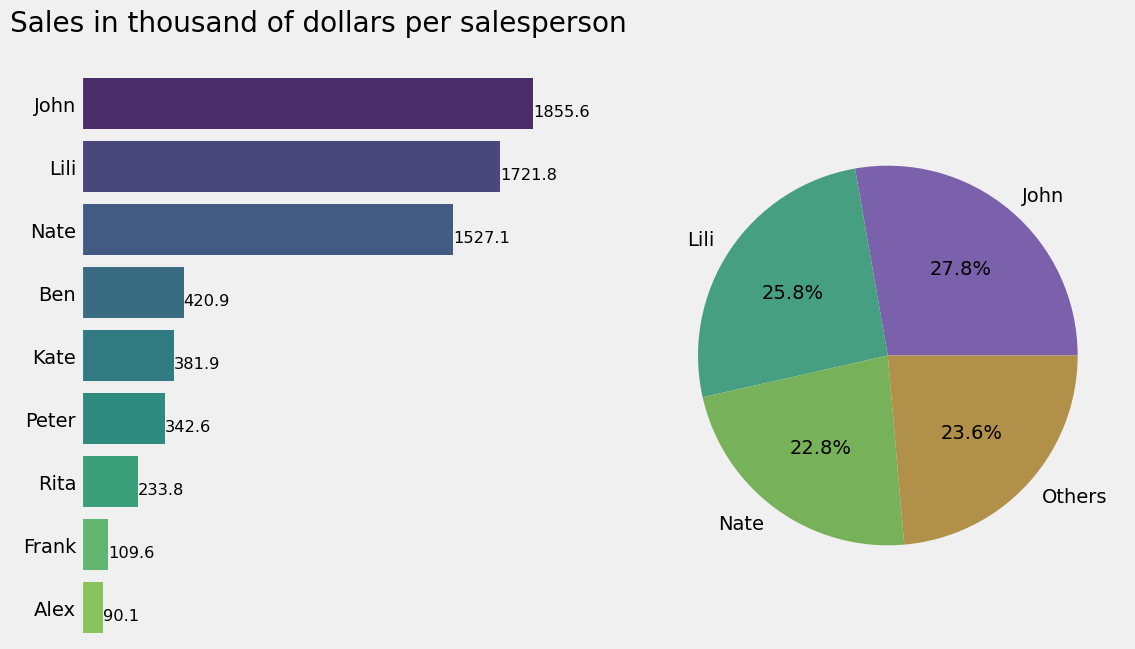

In [25]:
fig = plt.subplots(figsize=(12, 7))

# bar plot
plt.subplot(1, 2, 1) # row 1, col 2 index 1

# add the plot
ax = sns.barplot(x='sales_dollars_k', y='name', data=df, order=sales_per_seller_d['name'], 
    estimator=sum, errorbar=None, palette=sns.color_palette('viridis', 10))

# set labels and title
ax.set(xlabel='sales in thousand dollars', ylabel='', title='Sales in thousand of dollars per salesperson\n')

# remove x axis ticks
ax.get_xaxis().set_visible(False)

# set annotations
ax.bar_label(ax.containers[-1], fmt='\n%.1f', label_type='edge', size='small')

# pie chart
plt.subplot(1, 2, 2) 

# group all small values into one bin
sales_grouped_d = sales_per_seller_d.copy()
sales_grouped_d.loc[sales_grouped_d['sales_dollars_k'] < 500, 'name'] = 'Others'
sales_grouped_d = sales_grouped_d.groupby('name')['sales_dollars_k'].sum().reset_index()

plt.pie(sales_grouped_d['sales_dollars_k'], labels=sales_grouped_d['name'], 
    autopct='%.1f%%', colors=['#7B60AB','#469F81','#77B25A','#B19049'])

plt.show()

In [26]:
print('Total sales in 2022:', sales_total_d, 'dollars.')

Total sales in 2022: 6,683,439 dollars.


In [27]:
# finally, count total profit per sales person and order them from the biggest to the smallest
profit_per_seller = df.groupby(['name'])['profit_k'].sum().reset_index().sort_values('profit_k', ascending = False).reset_index(drop=True)
profit_per_seller

,name,profit_k
0,Nate,78.1
1,John,54.6
2,Lili,51.8
3,Peter,18.7
4,Rita,18.4
5,Kate,17.1
6,Ben,15.6
7,Frank,5.2
8,Alex,4.7


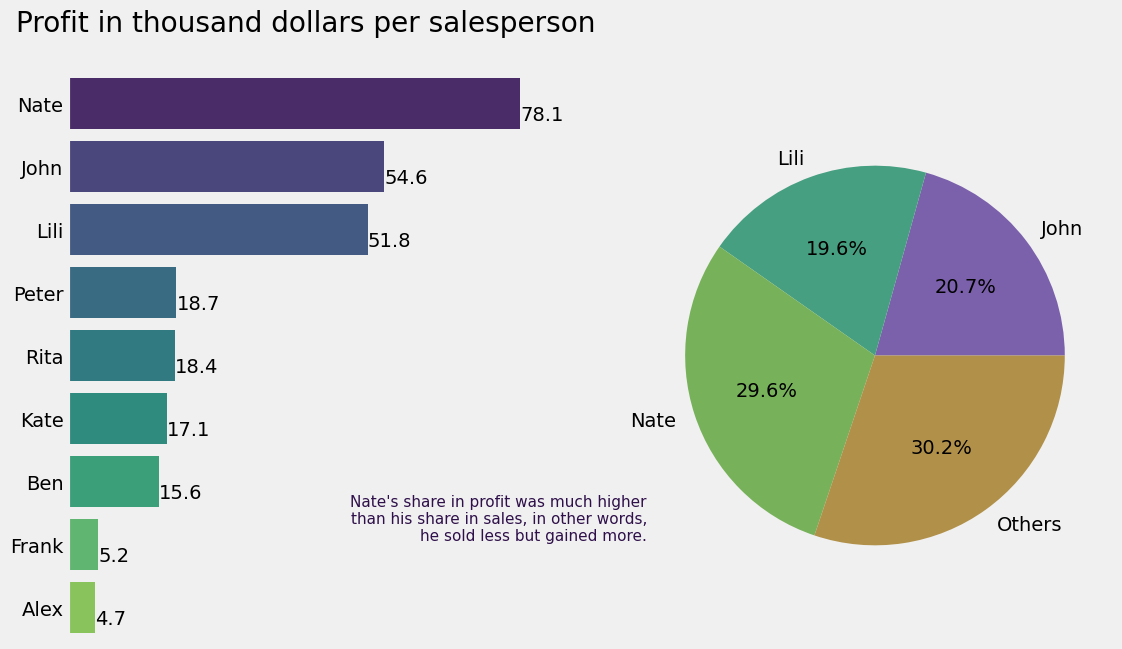

In [29]:
fig = plt.subplots(figsize=(12, 7))

# bar plot
plt.subplot(1, 2, 1) # row 1, col 2 index 1

# add the plot
ax = sns.barplot(x='profit_k', y='name', data=df, order=profit_per_seller['name'], 
    estimator=sum, errorbar=None, palette=sns.color_palette('viridis', 10))

# set labels and title
ax.set(xlabel='profit_k', ylabel='', title='Profit in thousand dollars per salesperson\n')

# remove x axis ticks
ax.get_xaxis().set_visible(False)

# set annotation
ax.bar_label(ax.containers[-1], fmt='\n%.1f', label_type='edge')

plt.text(100, 6.9, "Nate's share in profit was much higher\nthan his share in sales, in other words,\nhe sold less but gained more.", 
    horizontalalignment='right', size=11, weight='normal', wrap=True,
    color='#2F104A')

# pie chart
plt.subplot(1, 2, 2) 

# group all small values into one bin
profit_grouped = profit_per_seller.copy()
profit_grouped.loc[profit_grouped['profit_k'] < 50, 'name'] = 'Others'
profit_grouped = profit_grouped.groupby('name')['profit_k'].sum().reset_index()

plt.pie(profit_grouped['profit_k'], labels=profit_grouped['name'], 
    autopct='%.1f%%', colors=['#7B60AB','#469F81','#77B25A','#B19049'])   

plt.show()

## Sales and Profit Month per Month

Now, let's see how much was sold and gained month by month. 

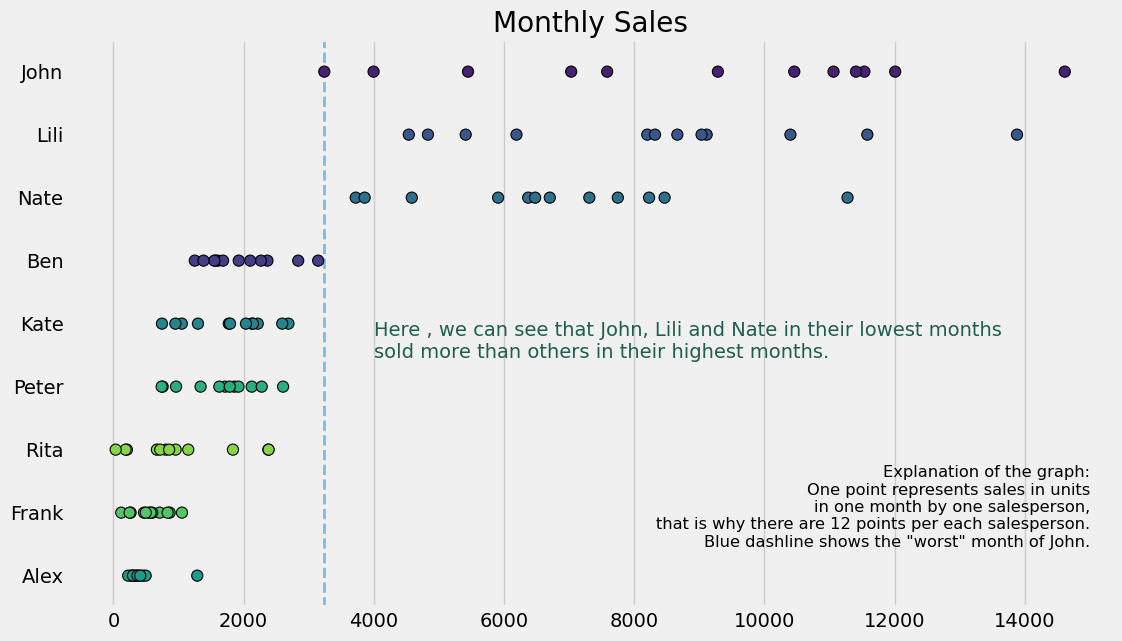

In [30]:
fig = plt.subplots(figsize=(12, 7))

# add the plot
ax = sns.stripplot(x='sales_units', y='name', data=df, jitter=False, order=sales_per_seller['name'], size=8, linewidth=0.8, 
    edgecolor='black', hue='name', legend=False, palette=sns.color_palette('viridis', 10))

# set xlabel
ax.set(xlabel='', ylabel='')

# add vertical line at min of John
min_john = df[df['name'] == 'John']['sales_units'].min()
plt.axvline(x=min_john, alpha=0.5, linewidth=2, linestyle='--') 

# add annotation 
plt.text(4000, 4.5, 'Here , we can see that John, Lili and Nate in their lowest months \nsold more than others in their highest months.', 
    horizontalalignment='left', size='medium', weight='normal', wrap=True, color='#1f5d50')

plt.text(15000, 7.5, 'Explanation of the graph:\nOne point represents sales in units\nin one month by one salesperson,\nthat is why there are 12 points per each salesperson.\nBlue dashline shows the "worst" month of John.', 
    horizontalalignment='right', size='small', weight='normal', wrap=True)
        

# set title
ax.set(title='Monthly Sales')
plt.show()

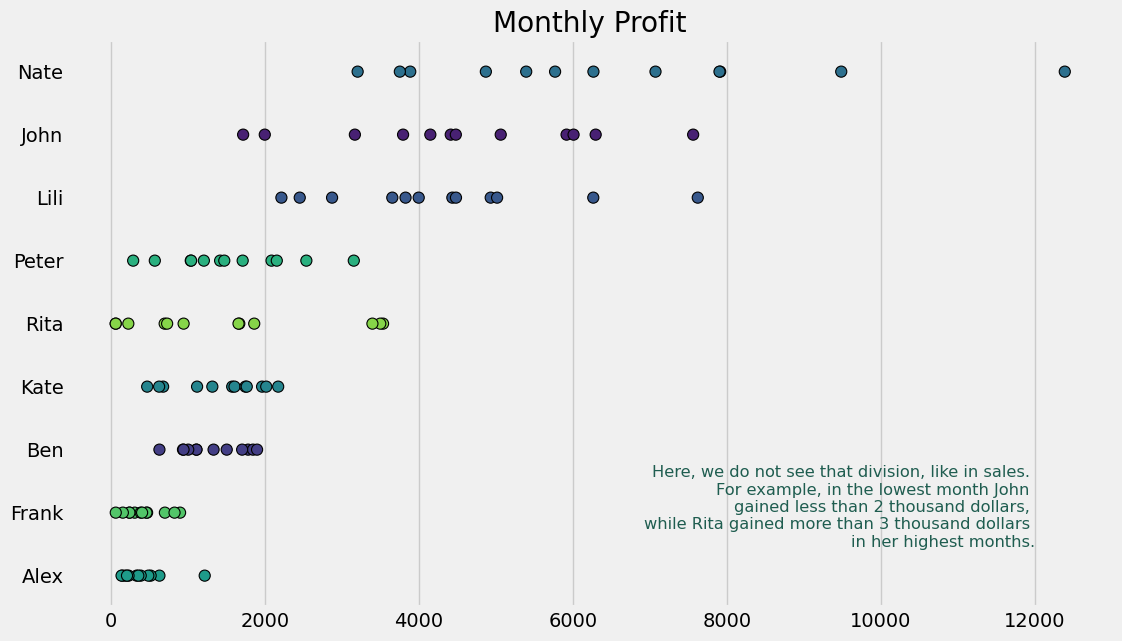

In [31]:
fig = plt.subplots(figsize=(12, 7))

# add the plot
ax = sns.stripplot(x='profit', y='name', data=df, jitter=False, order=profit_per_seller['name'], size=8, linewidth=0.8, 
    edgecolor='black', hue='name', legend=False, palette=sns.color_palette('viridis', 10))

# set xlabel
ax.set(xlabel='', ylabel='')

# add annotation 
plt.text(12000, 7.5, 'Here, we do not see that division, like in sales. \nFor example, in the lowest month John \ngained less than 2 thousand dollars, \nwhile Rita gained more than 3 thousand dollars \nin her highest months.', 
    horizontalalignment='right', size='small', weight='normal', wrap=True, color='#1f5d50')
 

# set title
ax.set(title='Monthly Profit')
plt.show()

## More analysis of profit

In [32]:
# count average profit interest per sales person and order them from the biggest to the smallest
margin_per_seller = df.groupby(['name'])['profit_margin'].mean().reset_index().sort_values('profit_margin', ascending = False).reset_index(drop=True)
margin_per_seller

,name,profit_margin
0,Rita,7.732500
1,Peter,5.636667
2,Alex,5.336667
3,Nate,5.073333
4,Frank,4.928333
5,Kate,4.466667
6,Ben,3.838333
7,Lili,3.130833
8,John,3.012500


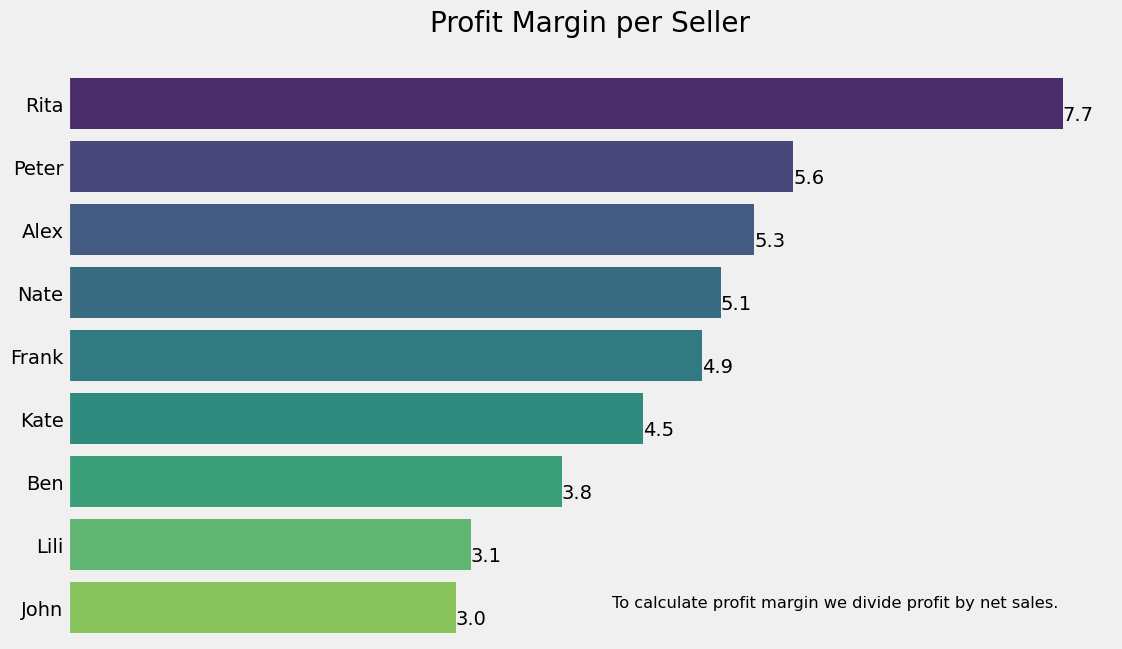

In [33]:
fig = plt.subplots(figsize=(12, 7))

# add the plot
ax = sns.barplot(x='profit_margin', y='name', data=df, 
    order=margin_per_seller['name'], estimator=np.mean, errorbar=None,
    palette=sns.color_palette('viridis', 10))

ax.set(xlabel='', ylabel='', title='Profit Margin per Seller\n')

# set annotation
ax.bar_label(ax.containers[-1], fmt='\n%.1f', label_type='edge')

# remove x axis ticks
ax.get_xaxis().set_visible(False)

# add annotation 
plt.text(7.7, 8, 'To calculate profit margin we divide profit by net sales.', 
    horizontalalignment='right', size='small')

plt.show()

### profit margin = $\frac{profit}{sales}$ * 100%

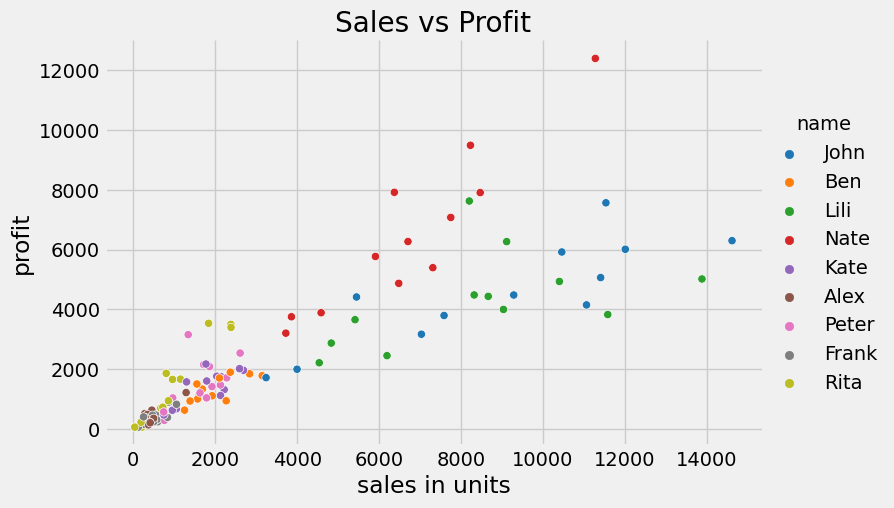

In [34]:
sns.relplot(data=df, y='profit', x='sales_units', hue='name', aspect=1.6,
    palette=sns.color_palette('tab10', 9))
plt.title('Sales vs Profit')
plt.xlabel('sales in units');

The more Nate sells, the more his profit grows. But for John and Lili from 8 thousand meters, the gain does not seem to depend on the sale.

## Conclusions and Recommendations

Based on the analysis, the following trends were observed in 2022:

- The months with the highest sales were September, October, and August, while the months with the lowest sales were December, February, November, as well as April and July.
- The highest gains were recorded in October, as well as in March, May, and January, while the lowest gains were in December, July, and November.
- John and Lili together accounted for 55% of textile sales, but only 40% of the profit. In contrast, Nate's sales accounted for 21% of textiles but brought in 29.5% of the profit. Other sellers who contributed to the profit were Peter and Rita (approximately 7% each), Kate (6.5%), and Ben (6%).
- Rita had the highest profit margin, while John and Lili had the lowest.
- Nate's profit grew in proportion to his sales, whereas John and Lili's profits did not seem to depend on sales beyond 8,000 meters.

Considering the above findings, it is recommended that Nate receives the highest bonus and recognition for his contribution to the company's profit. Additionally, the pricing policy should be reviewed in the next year to potentially set a profit margin and maximize the company's profitability. Further investigation is necessary to determine the optimal pricing strategy.